In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [155]:
data = sns.load_dataset('titanic')
print(data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [157]:
train_df = pd.read_csv('/Users/abhishekwaghchaure/Desktop/Datasets/titanic/train.csv')
test_df= pd.read_csv('/Users/abhishekwaghchaure/Desktop/Datasets/titanic/test.csv')

In [158]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [159]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [160]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Concating the train and test df to get 1309 total rows and treat it as our population

In [161]:
population = pd.concat([train_df.drop(columns = ['Survived']), test_df]).sample(1309)

In [162]:
population

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
330,331,3,"McCoy, Miss. Agnes",female,NaN,2,0,367226,23.2500,NaN,Q
127,1019,3,"McCoy, Miss. Alicia",female,NaN,2,0,367226,23.2500,NaN,Q
373,1265,2,"Harbeck, Mr. William H",male,44.0,0,0,248746,13.0000,NaN,S
409,410,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
625,626,1,"Sutton, Mr. Frederick",male,61.0,0,0,36963,32.3208,D50,S
210,211,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
728,729,2,"Bryhl, Mr. Kurt Arnold Gottfrid",male,25.0,1,0,236853,26.0000,NaN,S


/var/folders/vt/hgv58_ws0rjfsg_1d8fcxgww0000gn/T/ipykernel_3740/2029908539.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = population['Fare'])


<Axes: ylabel='Density'>

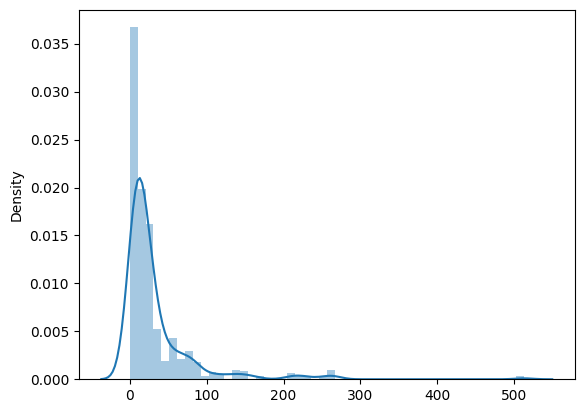

In [163]:
sns.distplot(x = population['Fare'])

### Sample sixe = 50 -> 100 times
Sample 50 data points of fare randomly 100 times

In [164]:
population['Fare'].sample(50).to_numpy()

array([ 39.6   ,  33.    ,  76.7292,  10.5   ,   7.75  ,  12.    ,
        26.    ,  32.3208,  15.5   ,   0.    ,  12.35  ,  59.4   ,
        13.    ,   7.225 ,   9.2167,   7.8958, 153.4625,  21.6792,
        13.    ,  90.    ,  73.5   ,  10.5   , 135.6333,   8.6625,
        19.5   ,   7.925 ,   0.    ,  81.8583, 221.7792,  31.275 ,
        61.175 ,   7.8542,   8.05  ,  10.5167,   7.875 ,   7.125 ,
         7.7958,   8.6625,   7.8958,   7.8958,  26.    ,  69.55  ,
         7.75  , 110.8833,   7.75  ,  20.25  ,   7.8958,  39.6875,
        30.5   ,  12.35  ])

In [165]:
samples= []
for i in range(100):
    samples.append(list(population['Fare'].dropna().sample(50)))

In [166]:
len(samples)

100

In [167]:
samples = np.array(samples)
samples

array([[ 26.    ,  15.7417,   7.2292, ...,  18.75  ,   7.55  ,  69.3   ],
       [ 16.1   ,   7.2292,   7.75  , ...,  21.    ,   7.25  ,  16.1   ],
       [ 26.    ,  13.    ,  93.5   , ...,   8.05  ,  13.    ,  28.7125],
       ...,
       [  7.8958,  27.7208, 133.65  , ...,   7.8958,   0.    ,   7.8292],
       [ 11.5   ,  29.    ,   7.8542, ..., 211.5   ,   7.8958,  69.55  ],
       [  7.05  ,  26.    ,   7.925 , ...,  23.    ,   7.8958,   7.75  ]])

In [168]:
sample_means = samples.mean(axis = 1)
sample_means

array([41.59142 , 25.201246, 30.295252, 35.533666, 44.18725 , 33.805752,
       21.536   , 34.955084, 37.97975 , 34.384416, 37.791834, 30.249252,
       32.074666, 29.947502, 31.60592 , 22.13908 , 27.454002, 38.077334,
       38.354334, 31.588834, 41.488002, 31.142004, 24.2315  , 31.407832,
       51.777334, 35.39975 , 27.710582, 43.43958 , 47.51725 , 30.639838,
       40.35475 , 24.908252, 50.121834, 33.890998, 56.184418, 36.118836,
       50.938244, 33.273994, 31.377082, 34.57017 , 36.697084, 35.297498,
       28.025672, 33.280168, 40.654916, 41.54767 , 40.884916, 26.533502,
       27.47583 , 31.058666, 26.781498, 28.802918, 31.474084, 36.971834,
       61.364166, 31.235162, 27.993834, 65.098916, 29.463836, 32.518582,
       36.725832, 42.053586, 44.793834, 27.93683 , 32.37658 , 26.385668,
       32.285   , 32.349082, 30.56175 , 38.812668, 30.428668, 35.387914,
       30.715916, 35.263912, 34.673834, 42.18275 , 33.74358 , 26.708332,
       24.789748, 30.907082, 31.732248, 34.744166, 

/var/folders/vt/hgv58_ws0rjfsg_1d8fcxgww0000gn/T/ipykernel_3740/2941074664.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_means)


<Axes: ylabel='Density'>

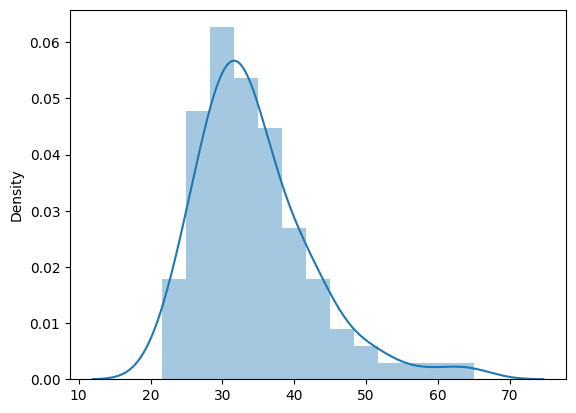

In [169]:
sns.distplot(sample_means)

In [170]:
sample_means.mean()

np.float64(34.5106673)

In [171]:
population['Fare'].mean()

np.float64(33.29547928134557)

## As we can see that the sample mean of fare == population fare mean

In [173]:
std_sample_means = sample_means.std()/np.sqrt(50)
print(std_sample_means)

1.1313936850363457


In [174]:
upper_limit = sample_means.mean() + 2*std_sample_means
lower_limit = sample_means.mean() - 2*std_sample_means

In [175]:
print(f"Our population fare mean will range from {lower_limit} <---> {upper_limit}")

Our population fare mean will range from 32.24787992992731 <---> 36.773454670072695


### And it is comming between mean * 2(standard deviation) of sample means which satisfies the central limit theorem

In [176]:
population['Fare'].mean()

np.float64(33.29547928134557)